
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> ### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Loading Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.query('revenue==0').count()['id']

6016

In [7]:
df.query('budget==0').count()['id']

5696

In [8]:
df.query('runtime==0').count()['id']

31

>### Budget, Revenue, and runtime features have zero values, which is unlogic. I suppose that they are missing values, but I will not drop them as they have large number of rows

In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning

In [10]:
to_drop = ['imdb_id', 'homepage', 'keywords', 'release_date', 'overview', 'runtime', 'tagline', 'cast', 'director' ]
df.drop(to_drop, axis=1,inplace= True)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


In [11]:
df.genres.fillna("Not specified", inplace = True)  

In [12]:
df.describe()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


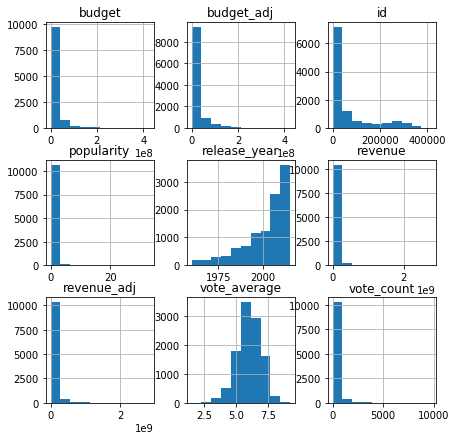

In [13]:
df.hist(figsize= (7,7));

In [14]:
df.genres = df.genres.str.split("|",expand=True)
df.genres.value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Not specified        23
Foreign               9
Name: genres, dtype: int64

> ### I split the genres for easy exploration, but it will affect results

<a id='eda'></a>
## Exploratory Data Analysis


## Question 1:  What are the most interesting genres over the years? 

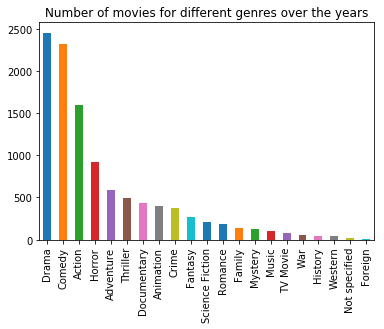

In [15]:
df.genres.value_counts().plot( kind = 'bar', title = 'Number of movies for different genres over the years');

>## The three most interesting genres over the years: Drama, Comedy and Action

## Question 2:  What are the most highest revenue, budget and profit genres over the years? 

In [16]:
revenue_mean = df.groupby(['genres']).revenue.mean()
revenue_mean

genres
Action             6.075854e+07
Adventure          1.247560e+08
Animation          7.145670e+07
Comedy             2.930248e+07
Crime              3.343632e+07
Documentary        1.972712e+06
Drama              2.514403e+07
Family             6.148926e+07
Fantasy            6.729393e+07
Foreign            0.000000e+00
History            4.436062e+07
Horror             1.686626e+07
Music              2.304616e+07
Mystery            2.415905e+07
Not specified      0.000000e+00
Romance            3.788650e+07
Science Fiction    7.965608e+07
TV Movie           5.384615e+05
Thriller           2.648324e+07
War                4.590766e+07
Western            3.109095e+07
Name: revenue, dtype: float64

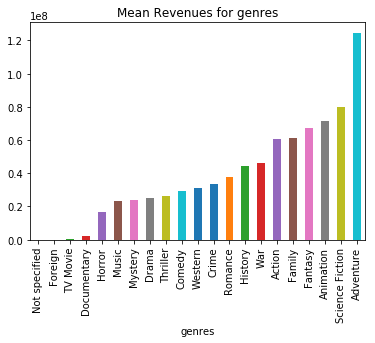

In [17]:
revenue_mean.sort_values().plot(kind='bar', title = 'Mean Revenues for genres');

> ## The three highest revenues genres: Adventue, Science Fiction, Animation

In [18]:
budget_mean = df.groupby(['genres']).budget.mean()
budget_mean

genres
Action             2.464650e+07
Adventure          4.023351e+07
Animation          2.149240e+07
Comedy             1.037857e+07
Crime              1.338997e+07
Documentary        4.308277e+05
Drama              1.032756e+07
Family             1.835339e+07
Fantasy            2.344872e+07
Foreign            0.000000e+00
History            1.593452e+07
Horror             5.617335e+06
Music              1.052200e+07
Mystery            1.010633e+07
Not specified      2.173913e+02
Romance            1.113169e+07
Science Fiction    2.511150e+07
TV Movie           2.500000e+05
Thriller           1.218484e+07
War                2.283407e+07
Western            1.951699e+07
Name: budget, dtype: float64

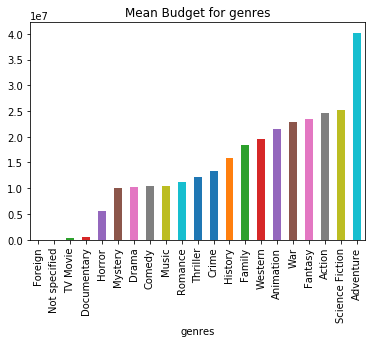

In [19]:
budget_mean.sort_values().plot(kind = 'bar', title = 'Mean Budget for genres');

> ## The three highest budget genres: Adventue, Science Fiction, Action

In [20]:
profit_mean = revenue_mean - budget_mean

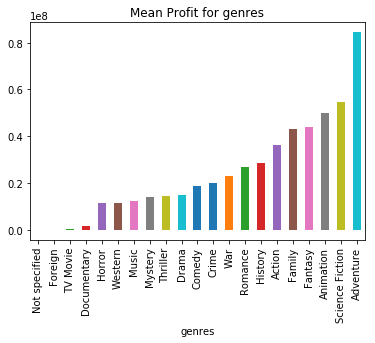

In [21]:
profit_mean.sort_values().plot(kind = 'bar', title = 'Mean Profit for genres');

> ## The three highest profit genres: Adventue, Science Fiction, Animation
> ## Action movies are higher than Animation movies in budget, but they are lower than Animation movies in revenue and profit

## Question 3: Which genres are most popular ?

In [22]:
pop_genres = df.groupby(['genres']).popularity.mean()
pop_genres

genres
Action             0.836394
Adventure          1.217868
Animation          0.810370
Comedy             0.537133
Crime              0.694063
Documentary        0.177023
Drama              0.552446
Family             0.730987
Fantasy            0.865390
Foreign            0.167124
History            0.764636
Horror             0.468611
Music              0.447730
Mystery            0.596896
Not specified      0.167966
Romance            0.704157
Science Fiction    1.073096
TV Movie           0.246190
Thriller           0.673381
War                0.767041
Western            0.690646
Name: popularity, dtype: float64

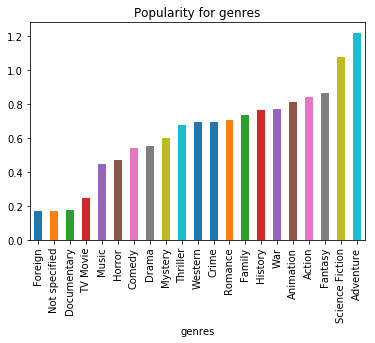

In [23]:
pop_genres.sort_values().plot(kind = 'bar', title = 'Popularity for genres');

> ## The three most Popular genres: Adventue, Science Fiction and Fantasy

## Question 4: What is the development in genres production over the years?
> Interested genres are:
* Adventure
* Science Fiction
* Action
* Animation
* Fantasy

In [24]:
interested_genres= ['Adventure','Science Fiction', 'Action', 'Animation', 'Fantasy'] 
df[df.genres.isin(interested_genres)].groupby('release_year')['genres'].value_counts()


release_year  genres         
1960          Action              8
              Adventure           2
1961          Action              3
              Adventure           2
              Fantasy             2
              Science Fiction     1
1962          Action              5
              Adventure           4
              Fantasy             1
1963          Adventure           5
              Action              3
              Animation           1
1964          Adventure           5
              Action              2
              Animation           2
              Fantasy             1
1965          Action              8
              Adventure           2
              Animation           1
1966          Action             11
              Adventure           4
              Animation           2
              Science Fiction     1
1967          Action              5
              Adventure           2
              Fantasy             2
              Animation           

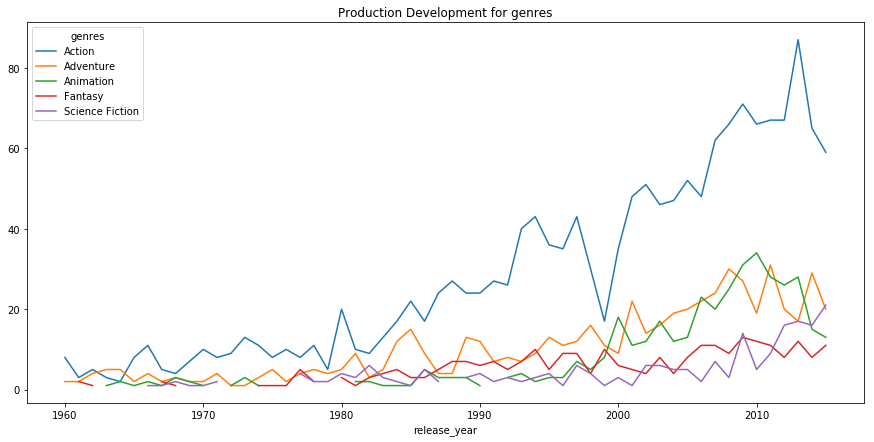

In [25]:
interested_genres= ['Adventure','Science Fiction', 'Action', 'Animation', 'Fantasy'] 
fig, ax = plt.subplots(figsize=(15,7))
genres_count = df[df.genres.isin(interested_genres)].groupby(['release_year','genres']).count()['id']
genres_count.unstack().plot(ax=ax, title = 'Production Development for genres');

> ## Action Movies have a very high increase in production compared to others

<a id='conclusions'></a>
# Conclusions

## Question 1:  What are the most interesting genres over the years? 
> ### The three most interesting genres over the years: Drama, Comedy and Action

## Question 2:  What are the most highest revenue, budget and profit genres over the years? 
> ### The three highest revenues genres: Adventue, Science Fiction, Animation
> ### The three highest budget genres: Adventue, Science Fiction, Action
> ### The three highest profit genres: Adventue, Science Fiction, Animation
> ### Action movies are higher than Animation movies in budget, but they are lower than Animation movies in revenue and profit

## Question 3: Which genres are most popular ?
> ### The three most Popular genres: Adventue, Science Fiction and Fantasy

## Question 4: What is the development in genres production over the years?
> Interested genres are:
* Adventure
* Science Fiction
* Action
* Animation
* Fantasy
> ### Action Movies have a very high increase in production compared to others


## Limitations
>### Budget, Revenue, and runtime features have zero values, which is unlogic. I supposed that they are missing values, but I did not drop them as they have large number of rows
> ### I split the genres for easy exploration, but it will affect results as many films have many genres classification

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0